In [39]:
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /home/aneeq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
import tensorflow as tf 

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [42]:
df = pd.read_csv (r'data.csv')

In [43]:
df.isnull().sum() 

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [45]:
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [46]:
df.drop(columns=['URLs'],inplace=True)

In [47]:
df['orignal'] = df['Headline']+ ' ' + df['Body'] 

In [48]:
df['orignal'][0]

'Four ways Bob Corker skewered Donald Trump Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Someone obviously mi

In [49]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /home/aneeq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords

In [51]:
stop_words = stopwords.words('english')

In [52]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [54]:
def preprocess(text):
    result =[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3 and token not in stop_words:
            result.append(token)
    return result 


In [55]:
df['clean'] =df['orignal'].astype(str).apply(preprocess) 

In [56]:
df['clean'][0]

['ways',
 'corker',
 'skewered',
 'donald',
 'trump',
 'image',
 'copyright',
 'getty',
 'images',
 'sunday',
 'morning',
 'donald',
 'trump',
 'went',
 'twitter',
 'tirade',
 'member',
 'party',
 'exactly',
 'huge',
 'news',
 'time',
 'president',
 'turned',
 'rhetorical',
 'cannons',
 'ranks',
 'time',
 'attacks',
 'particularly',
 'biting',
 'personal',
 'essentially',
 'called',
 'tennessee',
 'senator',
 'corker',
 'chair',
 'powerful',
 'senate',
 'foreign',
 'relations',
 'committee',
 'coward',
 'running',
 'election',
 'said',
 'corker',
 'begged',
 'president',
 'endorsement',
 'refused',
 'wrongly',
 'claimed',
 'corker',
 'support',
 'iranian',
 'nuclear',
 'agreement',
 'political',
 'accomplishment',
 'unlike',
 'colleagues',
 'corker',
 'free',
 'worry',
 'immediate',
 'political',
 'future',
 'hold',
 'tongue',
 'skip',
 'twitter',
 'post',
 'senbobcorker',
 'shame',
 'white',
 'house',
 'adult',
 'care',
 'center',
 'obviously',
 'missed',
 'shift',
 'morning',
 'senat

In [57]:
list_of_words =[]
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [58]:
len(list_of_words)

954605

In [59]:
total_words = len(list(set(list_of_words)))

In [60]:
total_words

41969

In [61]:
df['clean_joined']= df['clean'].apply(lambda x: " ".join(x))

In [62]:
df['clean_joined'][0]

'ways corker skewered donald trump image copyright getty images sunday morning donald trump went twitter tirade member party exactly huge news time president turned rhetorical cannons ranks time attacks particularly biting personal essentially called tennessee senator corker chair powerful senate foreign relations committee coward running election said corker begged president endorsement refused wrongly claimed corker support iranian nuclear agreement political accomplishment unlike colleagues corker free worry immediate political future hold tongue skip twitter post senbobcorker shame white house adult care center obviously missed shift morning senator corker senbobcorker october report spoke york times president choice quotes tennessee senator interview times particularly damning know president tweets things true know knows sugarcoat corker flat saying president liar knows senator particular challenging trump insistence unsuccessfully pleaded endorsement accusation broader corker pre

<AxesSubplot:xlabel='count', ylabel='Label'>

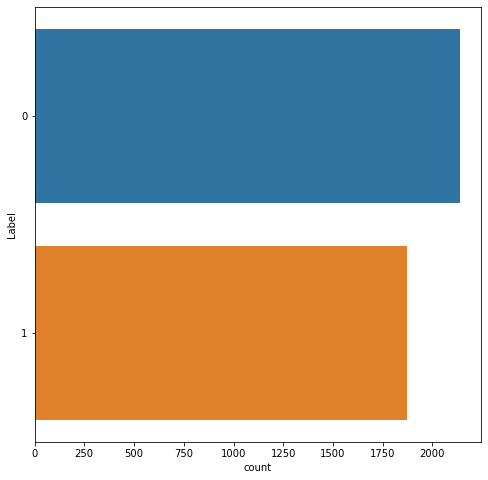

In [63]:
plt.figure(figsize = (8,8))
sns.countplot(y= 'Label' , data=df)

In [64]:
from nltk.tokenize import word_tokenize
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen= len(tokens)

In [69]:
print("the maximum number of words in any document is =  ", maxlen) 

the maximum number of words in any document is =   2683


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.Label, test_size=0.2)

In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [72]:
y_train

3810    0
1336    1
531     1
329     1
3394    1
       ..
3036    0
2239    1
3855    0
3590    0
3506    1
Name: Label, Length: 3207, dtype: int64

In [73]:
tokenizer = Tokenizer(num_words= total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 38792


In [74]:
tokenizer = Tokenizer(num_words= total_words)
tokenizer.fit_on_texts(x_test)
test_sequences = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 21653


In [75]:
print('The encoding for document\n' , df.clean_joined[0] , "\n is : " , train_sequences[0])

The encoding for document
 ways corker skewered donald trump image copyright getty images sunday morning donald trump went twitter tirade member party exactly huge news time president turned rhetorical cannons ranks time attacks particularly biting personal essentially called tennessee senator corker chair powerful senate foreign relations committee coward running election said corker begged president endorsement refused wrongly claimed corker support iranian nuclear agreement political accomplishment unlike colleagues corker free worry immediate political future hold tongue skip twitter post senbobcorker shame white house adult care center obviously missed shift morning senator corker senbobcorker october report spoke york times president choice quotes tennessee senator interview times particularly damning know president tweets things true know knows sugarcoat corker flat saying president liar knows senator particular challenging trump insistence unsuccessfully pleaded endorsement acc

In [76]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_train = pad_sequences(train_sequences , maxlen =2683, padding ='post', truncating='post')
padded_test = pad_sequences(test_sequences , maxlen =2683, padding ='post', truncating='post')

In [77]:
for i,doc in enumerate(padded_train[:2]):
    print('the padded encoding for documents' , i+1 , "is" , doc)

the padded encoding for documents 1 is [13685 11361  4552 ...     0     0     0]
the padded encoding for documents 2 is [8752  457  773 ...    0    0    0]


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM
from tensorflow.keras.layers import Embedding

## Relu Activation Function 128 LSTM DIMENSIONS

In [79]:
model= Sequential()
model.add (Embedding (total_words, output_dim =128 ))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy'  , metrics = ['acc'] )
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         5372032   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 5,635,457
Trainable params: 5,635,457
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
y_train = np.asarray(y_train)
model.fit(padded_train,y_train, batch_size =64 , validation_split =0.1 , epochs =2)

Epoch 1/2
46/46 [==============================] - 695s 15s/step - loss: 0.6849 - acc: 0.7179 - val_loss: 0.2081 - val_acc: 0.8972
Epoch 2/2
46/46 [==============================] - 721s 16s/step - loss: 0.0641 - acc: 0.9757 - val_loss: 0.1441 - val_acc: 0.9533


In [81]:
pred = model.predict(padded_test)

In [82]:
prediction= []
for i in range (len(pred)):
    if pred[i].item() >0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [83]:
from sklearn.metrics import accuracy_score

Model accuracy with Relu activation function:  0.5511221945137157
Confusion matrix with Relu activation function: 
 [[184 247]
 [113 258]]


<AxesSubplot:>

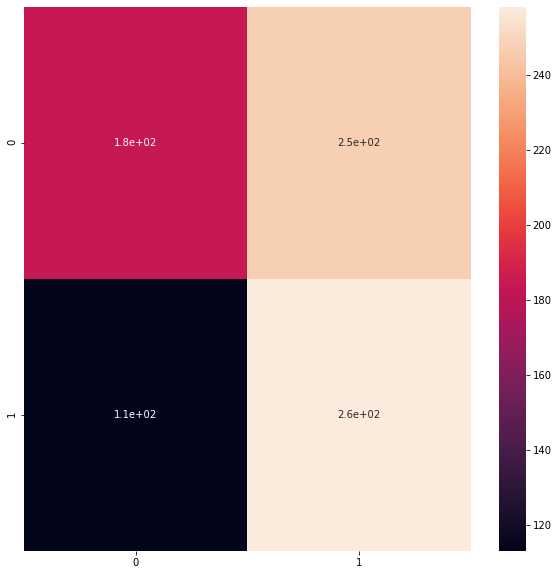

In [84]:
accuracy = accuracy_score(list(y_test), prediction)
print("Model accuracy with Relu activation function: ", accuracy)
from sklearn.metrics import confusion_matrix
ca = confusion_matrix(list(y_test), prediction)
print("Confusion matrix with Relu activation function: \n",ca)
plt.figure(figsize = (10,10))
sns.heatmap(ca, annot=True)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51       431
           1       0.51      0.70      0.59       371

    accuracy                           0.55       802
   macro avg       0.57      0.56      0.55       802
weighted avg       0.57      0.55      0.54       802



## Relu Activation Function 100 LSTM DIMENSIONS

In [88]:
model= Sequential()
model.add (Embedding (total_words, output_dim =100 ))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy'  , metrics = ['acc'] )
print("LSTM=100\n",model.summary())
pred = model.predict(padded_test)
prediction= []
for i in range (len(pred)):
    if pred[i].item() >0.5:
        prediction.append(1)
    else:
        prediction.append(0)
accuracy = accuracy_score(list(y_test), prediction)
print("Model accuracy with relu activation function: ", accuracy)
ca = confusion_matrix(list(y_test), prediction)
print("Confusion matrix: \n",ca)
print("Classification Report of sigmoid activation function\n",classification_report(y_test, prediction))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         4196900   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 4,357,901
Trainable params: 4,357,901
Non-trainable params: 0
_________________________________________________________________
LSTM=100
 None
Model accuracy with relu activation function:  0.5374064837905237
Confusion matrix: 
 [[431   0]
 [371   0]]
Classification Report of sigmoid activation function
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       431
           1       0.00      0.00      0.00       371

    accuracy                    

/home/aneeq/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Sigmoid Activation Function 128 LSTM DIMENSIONS

In [89]:
model= Sequential()
model.add (Embedding (total_words, output_dim =128 ))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy'  , metrics = ['acc'] )
print("LSTM=128  Activation=sigmoid\n",model.summary())
pred = model.predict(padded_test)
prediction= []
for i in range (len(pred)):
    if pred[i].item() >0.5:
        prediction.append(1)
    else:
        prediction.append(0)
accuracy = accuracy_score(list(y_test), prediction)
print("Model accuracy with sigmoid activation function: ", accuracy)
ca = confusion_matrix(list(y_test), prediction)
print("Confusion matrix: \n",ca)
print("Classification Report of sigmoid activation function\n",classification_report(y_test, prediction))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         5372032   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 5,635,457
Trainable params: 5,635,457
Non-trainable params: 0
_________________________________________________________________
LSTM=128  Activation=sigmoid
 None
Model accuracy with sigmoid activation function:  0.4613466334164589
Confusion matrix: 
 [[  0 431]
 [  1 370]]
Classification Report of sigmoid activation function
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       431
           1       0.46      1.00      0.63       371

    accur

#### Sigmoid Activation Function 100 LSTM DIMENSIONS

In [90]:
model= Sequential()
model.add (Embedding (total_words, output_dim =100 ))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy'  , metrics = ['acc'] )
print("LSTM=100  Activation=sigmoid\n",model.summary())
pred = model.predict(padded_test)
prediction= []
for i in range (len(pred)):
    if pred[i].item() >0.5:
        prediction.append(1)
    else:
        prediction.append(0)
accuracy = accuracy_score(list(y_test), prediction)
print("Model accuracy with sigmoid activation function: ", accuracy)
from sklearn.metrics import confusion_matrix
ca = confusion_matrix(list(y_test), prediction)
print("Confusion matrix: \n",ca)
print("Classification Report of sigmoid activation function\n",classification_report(y_test, prediction))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         4196900   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 4,357,901
Trainable params: 4,357,901
Non-trainable params: 0
_________________________________________________________________
LSTM=100  Activation=sigmoid
 None
Model accuracy with sigmoid activation function:  0.5361596009975063
Confusion matrix: 
 [[399  32]
 [340  31]]
Classification Report of sigmoid activation function
               precision    recall  f1-score   support

           0       0.54      0.93      0.68       431
           1       0.49      0.08      0.14       371

    accur

## Hyperbolic Tangent Activation Function 128 LSTM DIMENSIONS

In [91]:
model= Sequential()
model.add (Embedding (total_words, output_dim =128 ))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation = 'tanh'))
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy'  , metrics = ['acc'] )
print("LSTM=128  Activation=Tanh\n",model.summary())
pred = model.predict(padded_test)
prediction= []
for i in range (len(pred)):
    if pred[i].item() >0.5:
        prediction.append(1)
    else:
        prediction.append(0)
accuracy = accuracy_score(list(y_test), prediction)
print("Model accuracy with tanh activation function: ", accuracy)
from sklearn.metrics import confusion_matrix
ca = confusion_matrix(list(y_test), prediction)
print("Confusion matrix: \n",ca)
print("Classification Report of tanh activation function\n",classification_report(y_test, prediction))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         5372032   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 5,635,457
Trainable params: 5,635,457
Non-trainable params: 0
_________________________________________________________________
LSTM=128  Activation=Tanh
 None
Model accuracy with tanh activation function:  0.5374064837905237
Confusion matrix: 
 [[431   0]
 [371   0]]
Classification Report of tanh activation function
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       431
           1       0.00      0.00      0.00       371

    accuracy      

## Hyperbolic Tangent Activation Function 100 LSTM DIMENSIONS

In [92]:
model= Sequential()
model.add (Embedding (total_words, output_dim =100 ))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation = 'tanh'))
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy'  , metrics = ['acc'] )
print("LSTM=100  Activation=Tanh\n",model.summary())
pred = model.predict(padded_test)
prediction= []
for i in range (len(pred)):
    if pred[i].item() >0.5:
        prediction.append(1)
    else:
        prediction.append(0)
accuracy = accuracy_score(list(y_test), prediction)
print("Model accuracy with tanh activation function: ", accuracy)
from sklearn.metrics import confusion_matrix
ca = confusion_matrix(list(y_test), prediction)
print("Confusion matrix: \n",ca)
print("Classification Report of tanh activation function\n",classification_report(y_test, prediction))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         4196900   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 4,357,901
Trainable params: 4,357,901
Non-trainable params: 0
_________________________________________________________________
LSTM=100  Activation=Tanh
 None
Model accuracy with tanh activation function:  0.5374064837905237
Confusion matrix: 
 [[431   0]
 [371   0]]
Classification Report of tanh activation function
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       431
           1       0.00      0.00      0.00       371

    accuracy      